In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nips-papers/paper_authors.csv
/kaggle/input/nips-papers/papers.csv
/kaggle/input/nips-papers/authors.csv
/kaggle/input/nips-papers/database.sqlite


In [2]:
import numpy as np
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import CoherenceModel

# Load the dataset
data = pd.read_csv('/kaggle/input/nips-papers/papers.csv')  # Update the path



LDA


In [4]:
titles = data['title'].astype(str).tolist()  # Use the title column

# Preprocessing: Tokenization, removing stop words, etc.
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(titles)




In [6]:
import gensim
from gensim.corpora import Dictionary

# Prepare data for LDA
texts = [doc.split() for doc in titles]  # Tokenize documents
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)


LDA Coherence Score: 0.2684
Topic 1: 0.030*"of" + 0.027*"and" + 0.021*"in" + 0.019*"the" + 0.018*"to" + 0.017*"Information" + 0.016*"a" + 0.016*"for" + 0.012*"A" + 0.010*"Learning"
Topic 2: 0.065*"of" + 0.030*"and" + 0.029*"in" + 0.021*"the" + 0.013*"Gradient" + 0.013*"Descent" + 0.011*"A" + 0.010*"Stochastic" + 0.010*"Analysis" + 0.009*"to"
Topic 3: 0.039*"for" + 0.023*"A" + 0.018*"a" + 0.017*"Recognition" + 0.014*"in" + 0.014*"Matrix" + 0.011*"Speech" + 0.009*"Factorization" + 0.009*"the" + 0.007*"to"
Topic 4: 0.028*"with" + 0.022*"Learning" + 0.015*"neural" + 0.014*"networks" + 0.013*"Active" + 0.013*"to" + 0.011*"and" + 0.011*"in" + 0.010*"from" + 0.010*"Filtering"
Topic 5: 0.080*"for" + 0.049*"Learning" + 0.019*"with" + 0.017*"and" + 0.015*"Optimization" + 0.014*"Models" + 0.012*"via" + 0.011*"of" + 0.011*"Sparse" + 0.011*"Kernel"
Topic 6: 0.032*"with" + 0.031*"and" + 0.026*"for" + 0.017*"to" + 0.015*"of" + 0.014*"Dynamic" + 0.013*"Functions" + 0.013*"Analysis" + 0.012*"Clustering

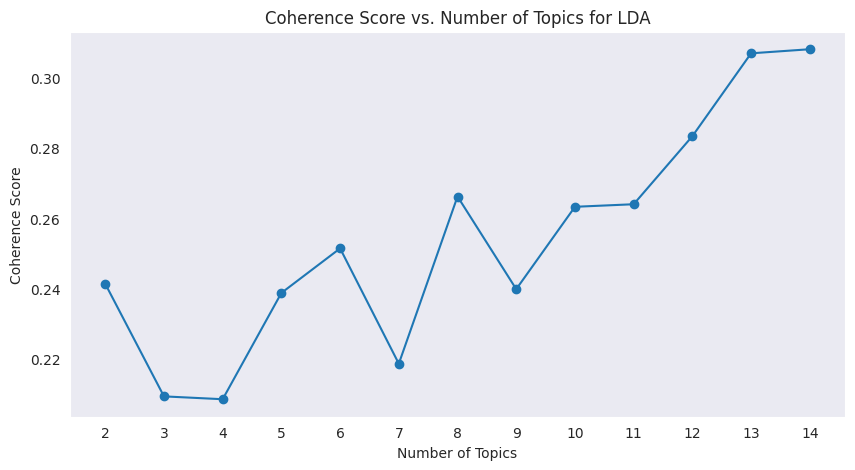

In [8]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()

print(f'LDA Coherence Score: {coherence_score:.4f}')

# Visualization of topics
def display_topics(model, num_words=10):
    for idx, topic in model.print_topics(num_words=num_words):
        print(f"Topic {idx + 1}: {topic}")

# Display topics
display_topics(lda_model)

# Optional: Visualize the coherence score
# For demonstration, let's visualize the coherence score for a range of topics
topic_range = range(2, 15)
coherence_scores = []

for n_topics in topic_range:
    lda_model = gensim.models.LdaModel(corpus, num_topics=n_topics, id2word=dictionary, passes=15)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

# Plotting coherence scores
plt.figure(figsize=(10, 5))
plt.plot(topic_range, coherence_scores, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs. Number of Topics for LDA')
plt.xticks(topic_range)
plt.grid()
plt.show()

**LSA**

In [9]:
documents = data['title'].astype(str).tolist()  # Adjust based on your column name

# Preprocessing (tokenization, stop word removal, etc.)
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# LSA
lsa_model = TruncatedSVD(n_components=10)  # Adjust number of topics
lsa_topic_matrix = lsa_model.fit_transform(X)

terms = vectorizer.get_feature_names_out()
lsa_topics = [terms[i] for i in lsa_model.components_.argsort()[:, -1:-11:-1]]

In [11]:
lsa_topics

[array(['learning', 'networks', 'neural', 'using', 'reinforcement',
        'models', 'model', 'deep', 'multi', 'bayesian'], dtype=object),
 array(['neural', 'networks', 'network', 'using', 'recurrent', 'model',
        'models', 'deep', 'time', 'training'], dtype=object),
 array(['models', 'using', 'inference', 'bayesian', 'gaussian', 'model',
        'graphical', 'process', 'sparse', 'data'], dtype=object),
 array(['using', 'model', 'network', 'based', 'recognition', 'data',
        'visual', 'selection', 'sparse', 'classification'], dtype=object),
 array(['neural', 'model', 'network', 'models', 'based', 'learning',
        'control', 'graphical', 'probabilistic', 'inference'], dtype=object),
 array(['model', 'networks', 'bayesian', 'inference', 'optimization',
        'based', 'data', 'stochastic', 'selection', 'variational'],
       dtype=object),
 array(['data', 'analysis', 'optimization', 'gaussian', 'inference',
        'stochastic', 'algorithms', 'bayesian', 'multi', 'sparse'],

LDA

In [14]:
papers = data[['id','title']]
papers['processed_title'] = papers['title'].map(lambda x:x.lower())
papers.head()

/tmp/ipykernel_31/4206544391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  papers['processed_title'] = papers['title'].map(lambda x:x.lower())


,id,title,processed_title
0,1,Self-Organization of Associative Database and ...,self-organization of associative database and ...
1,10,A Mean Field Theory of Layer IV of Visual Cort...,a mean field theory of layer iv of visual cort...
2,100,Storing Covariance by the Associative Long-Ter...,storing covariance by the associative long-ter...
3,1000,Bayesian Query Construction for Neural Network...,bayesian query construction for neural network...
4,1001,"Neural Network Ensembles, Cross Validation, an...","neural network ensembles, cross validation, an..."


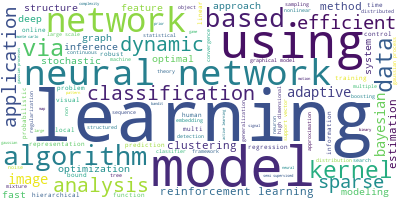

In [15]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['processed_title'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [17]:
import gensim
from gensim.utils import simple_preprocess
import nltk


In [18]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use']) # expand the stop word list by adding these customized words

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
        

In [19]:
data1 = papers.processed_title.values.tolist()

# remove stop words and convert each title into a list of words
data_words = remove_stopwords(data1)
print(data_words[0])
print(data_words[2])

['self', 'organization', 'associative', 'database', 'applications']
['storing', 'covariance', 'associative', 'long', 'term', 'potentiation', 'depression', 'synaptic', 'strengths', 'hippocampus']


In [20]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus: a collection of documents and each document is a list of words
texts = data_words

# Convert each document into a bag-of-words (BoW) format = a list of (token_id, token_count) tuples.
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[0])
print(texts[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]
['self', 'organization', 'associative', 'database', 'applications']


In [21]:
from pprint import pprint
import numpy as np 

# number of topics
K = 10

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=K,alpha='asymmetric',eta=0.01)

In [22]:
for idx,topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.063*"learning" + 0.025*"neural" + 0.019*"networks" + 0.014*"network" + 0.013*"using" + 0.010*"models" + 0.009*"optimal" + 0.009*"inference" + 0.009*"variational" + 0.009*"supervised"


Topic: 1 
Words: 0.059*"networks" + 0.042*"neural" + 0.028*"learning" + 0.016*"recurrent" + 0.014*"linear" + 0.012*"time" + 0.011*"scalable" + 0.010*"using" + 0.010*"analysis" + 0.009*"processes"


Topic: 2 
Words: 0.041*"learning" + 0.030*"clustering" + 0.024*"algorithms" + 0.018*"matrix" + 0.014*"policy" + 0.014*"active" + 0.013*"approximation" + 0.013*"models" + 0.011*"inference" + 0.010*"linear"


Topic: 3 
Words: 0.030*"generative" + 0.029*"model" + 0.025*"selection" + 0.022*"learning" + 0.020*"recognition" + 0.019*"models" + 0.016*"neural" + 0.016*"adaptive" + 0.016*"speech" + 0.015*"dynamic"


Topic: 4 
Words: 0.029*"learning" + 0.025*"model" + 0.025*"modeling" + 0.019*"neural" + 0.018*"networks" + 0.018*"using" + 0.017*"matching" + 0.014*"output" + 0.013*"simple" + 0.013*"fast"

In [23]:
doc_lda = lda_model[corpus]

# iterate through documents/titles
for i in range(len(texts)):
    docbow = corpus[i] # get the document BoW
    doc_topics = lda_model.get_document_topics(docbow,minimum_probability=0.0) # Return topic distribution for the given document BoW, as a list of (topic_id, topic_probability) 2-tuples.
    doc_topic_prob = np.array([v[1] for v in doc_topics]) # convert it into a numpy array
    if(i < 5):
        print('paper:',i+1,', dominant topic:',np.argmax(doc_topic_prob)+1) # choose the dominate topic (i.e., with the maximum topic probability among K topics)
print(".....")

paper: 1 , dominant topic: 1
paper: 2 , dominant topic: 2
paper: 3 , dominant topic: 1
paper: 4 , dominant topic: 1
paper: 5 , dominant topic: 1
.....


In [24]:
# Calculate and return per-word likelihood bound, using a chunk of documents as evaluation corpus.
# Also output the calculated statistics, including the perplexity=2^(-bound), to log at INFO level.

perplexity_score = lda_model.log_perplexity(corpus)
print('Perplexity score: ', perplexity_score)

Perplexity score:  -19.40579845379026


NMF

In [27]:
from sklearn.decomposition import NMF
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF
from gensim.models import CoherenceModel

# Preprocessing: Tokenization, removing stop words, etc.
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Convert sparse matrix to array for NMF
X_array = X.toarray()



In [28]:
# Set the number of topics
n_topics = 10  # You can adjust this later based on coherence scores

# Fit NMF model
nmf_model = NMF(n_components=n_topics, random_state=1)
nmf_topic_matrix = nmf_model.fit_transform(X_array)

# Get feature names
terms = vectorizer.get_feature_names_out()

# Display topics and their top words
def display_nmf_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
display_nmf_topics(nmf_model, terms, 10)


Topic #0:
learning reinforcement supervised deep active multi multiple online unsupervised efficient
Topic #1:
networks deep recurrent neural training convolutional time dynamic continuous neurons
Topic #2:
models graphical markov linear hidden mixture latent probabilistic generative inference
Topic #3:
neural network recognition control analog recurrent time vlsi speech dynamics
Topic #4:
using recognition image sparse classification speech detection random prediction visual
Topic #5:
model visual selection based recognition object human probabilistic latent hidden
Topic #6:
data analysis clustering large component kernel scale high feature dimensional
Topic #7:
bayesian inference variational approximate nonparametric approach probabilistic map monte carlo
Topic #8:
based optimization stochastic gradient algorithms estimation convex online methods efficient
Topic #9:
gaussian process multi processes regression sparse classification time task dimensional


In [29]:
# Prepare data for coherence score
texts = [doc.split() for doc in documents]  # Tokenize documents
dictionary = gensim.corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Compute Coherence Score
def compute_coherence_nmf(nmf_model, corpus, texts, dictionary):
    # Extract topics from NMF model
    topic_words = []
    for topic in nmf_model.components_:
        topic_words.append([terms[i] for i in topic.argsort()[:-11:-1]])
    
    # Create Gensim Coherence Model
    coherence_model = CoherenceModel(topics=topic_words, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

# Calculate coherence score
coherence_score = compute_coherence_nmf(nmf_model, corpus, texts, dictionary)
print(f'NMF Coherence Score: {coherence_score:.4f}')


NMF Coherence Score: 0.3528


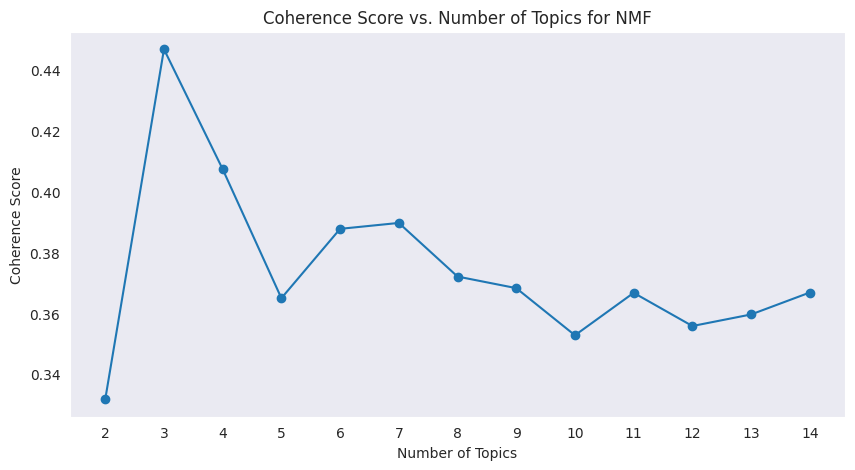

In [31]:
import matplotlib.pyplot as plt

# Range of topics to evaluate
n_topics_range = range(2, 15)
coherence_scores = []

for n_topics in n_topics_range:
    nmf_model = NMF(n_components=n_topics, random_state=1)
    nmf_topic_matrix = nmf_model.fit_transform(X_array)
    score = compute_coherence_nmf(nmf_model, corpus, texts, dictionary)
    coherence_scores.append(score)

# Plotting coherence scores
plt.figure(figsize=(10, 5))
plt.plot(n_topics_range, coherence_scores, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs. Number of Topics for NMF')
plt.xticks(n_topics_range)
plt.grid()
plt.show()

